## STEEL INDUSTRY ENERGY CONSUMPTION PREDICTION

## Name : NAFLA K V
## Organization : Entri Elevate
## Date : 20/01/2025

# Overview of Problem Statement

Energy consumption is a critical factor in the steel industry, where efficient energy management can lead to cost savings and improved sustainability. Steel production processes, such as heating, melting, and rolling, require significant amounts of power, making it essential to predict energy consumption accurately. Traditional methods of energy monitoring often fail to capture complex patterns, leading to inefficiencies and increased operational costs. By leveraging machine learning, this project aims to develop a predictive model that can analyze historical data and forecast energy consumption based on key influencing factors.

The dataset used in this study includes various parameters such as  power usage, and production metrics, all of which contribute to overall energy consumption. However, predicting energy usage is challenging due to fluctuations in production schedules, variations in equipment performance, and external factors like environmental conditions. Machine learning models can help uncover hidden patterns in the data, enabling more accurate predictions and better energy management strategies.

By applying data-driven techniques, this project seeks to optimize energy usage in steel manufacturing, reducing waste and operational costs. The insights gained from predictive modeling can assist industries in making informed decisions, improving energy efficiency, and promoting sustainable practices. Ultimately, this study aims to provide a reliable and practical solution for energy consumption forecasting, contributing to the advancement of smart and efficient industrial operations.

# Objective

The aim of this project is to analyze and predict the energy consumption in kilowatt-hours (kWh) within the steel manufacturing process. The insights gained from this study can help industries enhance productivity while minimizing energy waste and environmental impact.

# Data Description

### SOURCE :
Dataset can be downloaded from the link:https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

### Features :
1. date: Timestamp in string format.
2. Usage_kWh (float64) – The total energy consumed in kilowatt-hours (kWh). (Target Variable)
3. Lagging_Current_Reactive.Power_kVarh (float64) – The reactive power consumption when the current lags behind the voltage (measured in kilovar-hours, kVarh).
4. Leading_Current_Reactive_Power_kVarh (float64) – The reactive power consumption when the current leads the voltage (measured in kVarh).
5. CO2(tCO2) (float64) – Carbon dioxide emissions associated with energy consumption, measured in metric tons of CO2.
6. Lagging_Current_Power_Factor (float64) – The power factor when the current lags the voltage (percentage).
7. Leading_Current_Power_Factor (float64) – The power factor when the current leads the voltage (percentage).
8. NSM (int64) – "Number of Seconds from Midnight" – a time-based feature representing the time of the day in seconds.
9. WeekStatus (object) – Indicates whether the recorded data is from a "Weekday" or "Weekend".
10. Day_of_week (object) – The specific day of the week (e.g., Monday, Tuesday, etc.).
11. Load_Type (object) – The category of power usage, classified as "Light_Load", "Medium_Load", or "Maximum_Load".






# Data Collection

In [1]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# load dataset
data = pd.read_csv(r"C:\Users\nafla\Downloads\steel+industry+energy+consumption\Steel_industry_data.csv")
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Data Preprocessing

In [3]:
data.shape

(35040, 11)

#### The dataset contains 35040 rows and 11 columns

In [4]:
data.columns


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [5]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
data.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


## Observation:
### The column 'date' is not going to contribute anything in the model building. So we can drop them.







In [7]:
data.drop(columns=['date'] ,axis=1, inplace = True)
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [8]:
# datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


## Missing values check

In [9]:
# missing values check
data.isnull().sum()/len(data)*100

Usage_kWh                               0.0
Lagging_Current_Reactive.Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2(tCO2)                               0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
WeekStatus                              0.0
Day_of_week                             0.0
Load_Type                               0.0
dtype: float64

### The dataset has no null values.

## Duplicates check

In [10]:
# check for duplicated rows
data.duplicated().sum()

81

### This dataset contains 81 duplicates so we can drop them.

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(34959, 10)

### The following table indicates the statistical analysis of the dataset. From here we can identify the count of rows,mean,standard deviation, minimum value, 25%, 50%, 75% and maximum values in each features. For a normally distributed dataset, the mean and 50% values are closer, variations from each indiactes the presence of outliers in the corresponding features.

In [12]:
# statistical analysis
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000
mean,27.443111,13.056014,3.875959,0.011551,80.625036,84.350093,42781.343860
std,33.462669,16.319073,7.427964,0.016160,18.902835,30.467553,24923.195433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.420000,99.690000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,88.000000,100.000000,43200.000000
75%,51.300000,22.720000,2.090000,0.020000,99.040000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [13]:
data.nunique()

Usage_kWh                               3343
Lagging_Current_Reactive.Power_kVarh    1954
Leading_Current_Reactive_Power_kVarh     768
CO2(tCO2)                                  8
Lagging_Current_Power_Factor            5079
Leading_Current_Power_Factor            3366
NSM                                       96
WeekStatus                                 2
Day_of_week                                7
Load_Type                                  3
dtype: int64

## Selecting numerical columns

In [14]:
num_data = data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

## Checking skewness

In [15]:
num_data.skew()

Usage_kWh                               1.194046
Lagging_Current_Reactive.Power_kVarh    1.434391
Leading_Current_Reactive_Power_kVarh    1.732458
CO2(tCO2)                               1.145943
Lagging_Current_Power_Factor           -0.610658
Leading_Current_Power_Factor           -1.510146
NSM                                    -0.002367
dtype: float64

### Insights:

#### Numerical Data:

Energy usage (Usage_kWh) ranges from 0 to 157.18 with a mean of ~27.39.

Reactive powers (lagging and leading) and CO2 emissions have highly skewed distributions with many near-zero values.

Power factors have mostly high values, with the majority close to 100%.

NSM (Number of Seconds since Midnight) ranges from 0 to 85,500, representing a full 24-hour period.


#### Categorical Data:

WeekStatus: Two categories – "Weekday" and "Weekend".

Day_of_week: Seven categories – days of the week.

Load_Type: Three categories – "Light_Load", "Medium_Load", "Maximum_Load".



## Checking Outliers

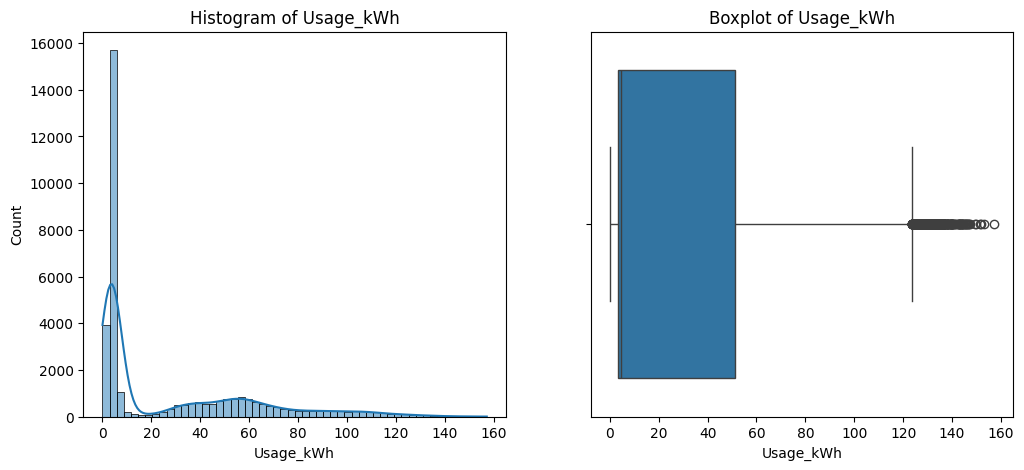

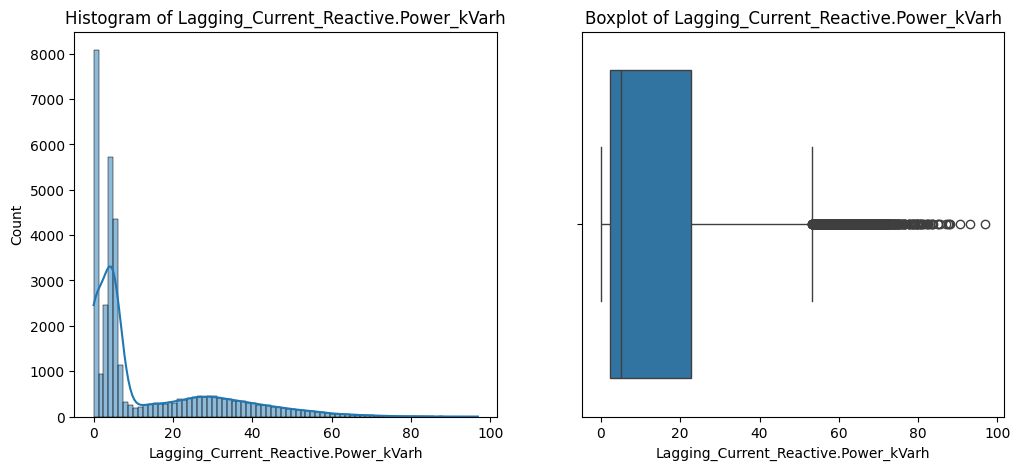

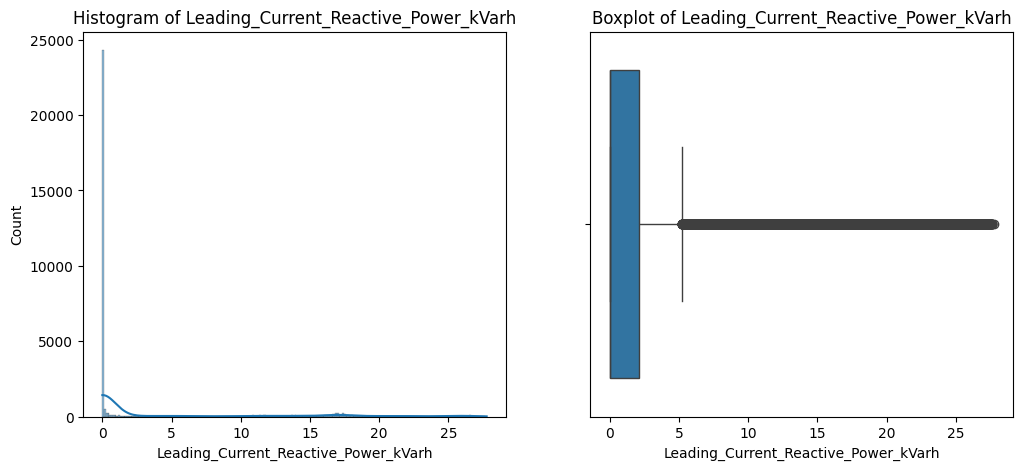

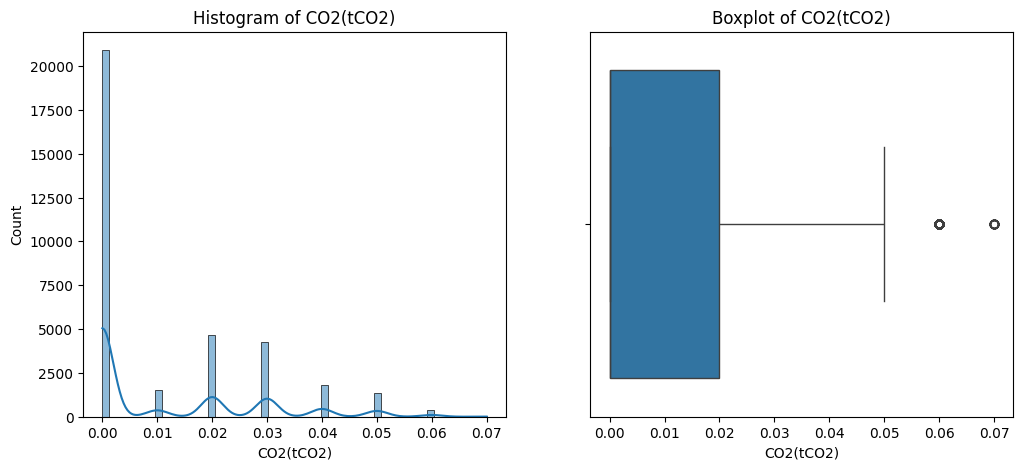

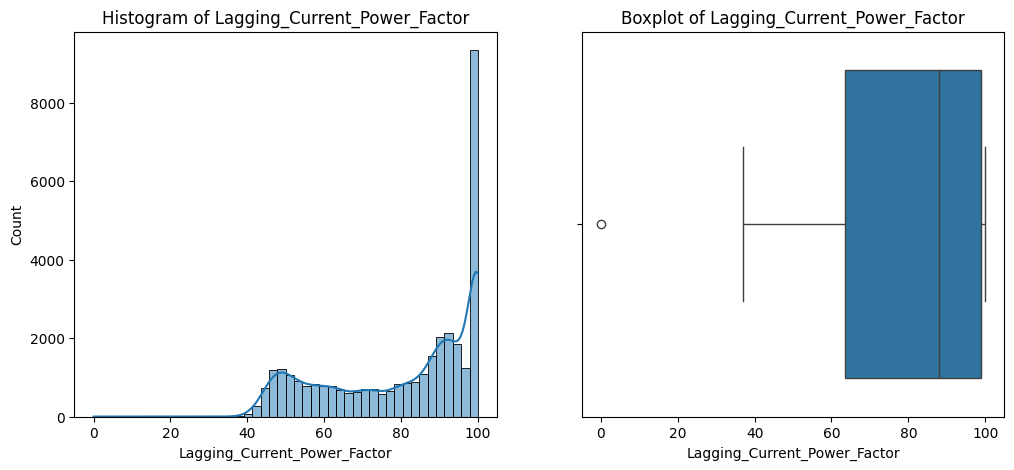

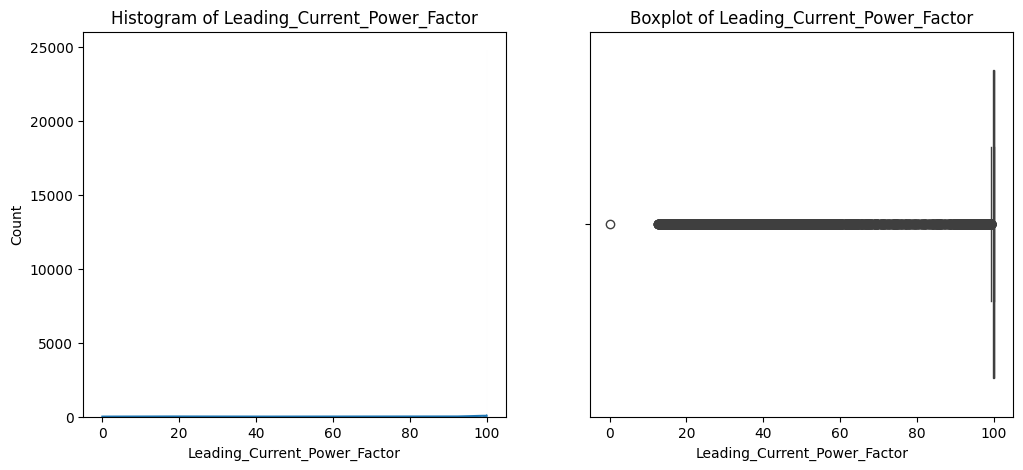

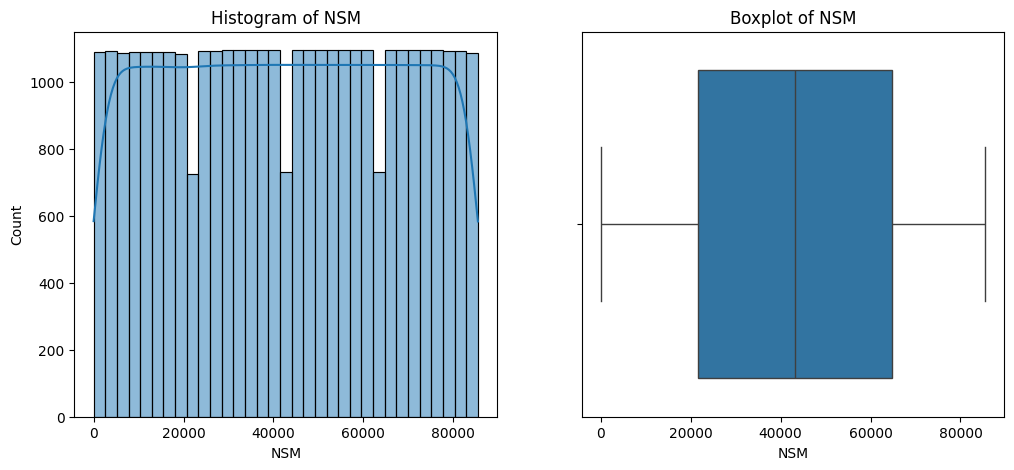

In [16]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

## Treating outliers

In [17]:
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))

# Condition 1: If the value is less than the lower bound,Replace it with the lower bound.
# Condition 2: Else if the value is greater than the upper bound,Replace it with the upper bound.
# Else keep the original value.
print("Outliers have been capped for all numeric columns.")
print(data)

Outliers have been capped for all numeric columns.
       Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0           3.17                                  2.95   
1           4.00                                  4.46   
2           3.24                                  3.28   
3           3.31                                  3.56   
4           3.82                                  4.50   
...          ...                                   ...   
35035       3.85                                  4.86   
35036       3.74                                  3.74   
35037       3.78                                  3.17   
35038       3.78                                  3.06   
35039       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                   

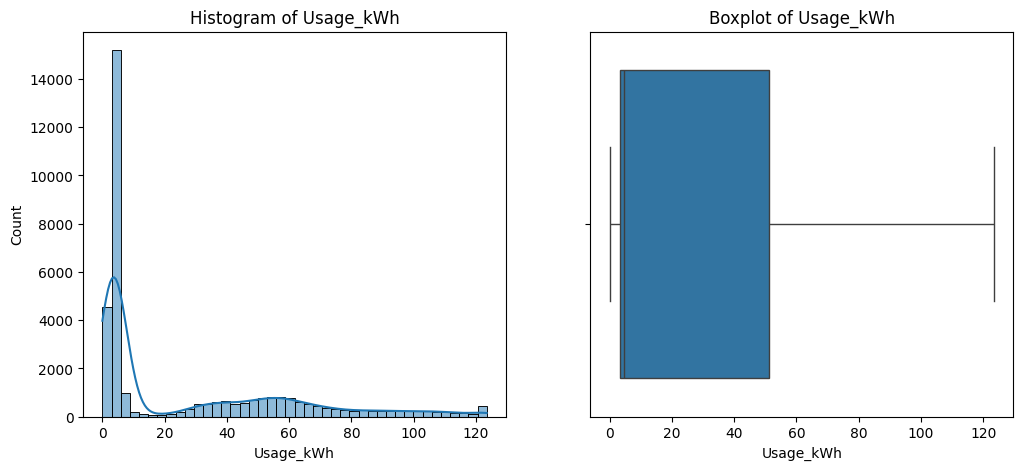

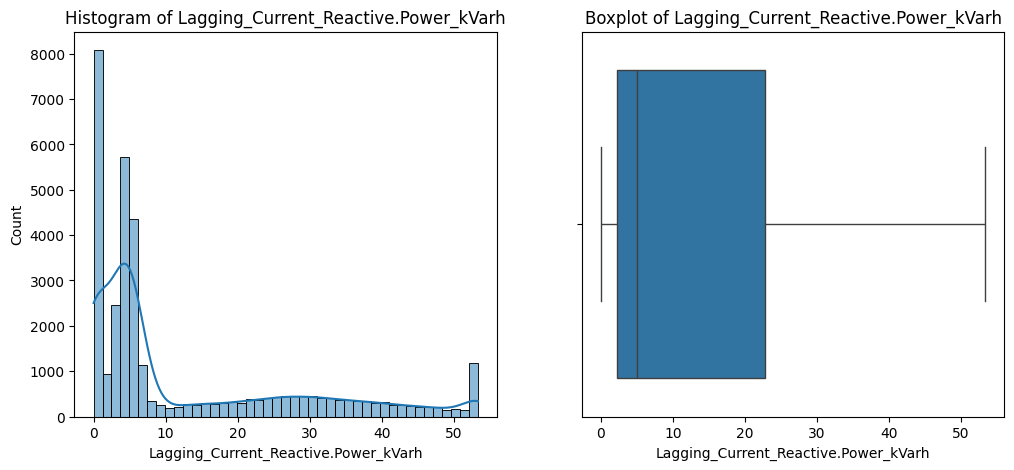

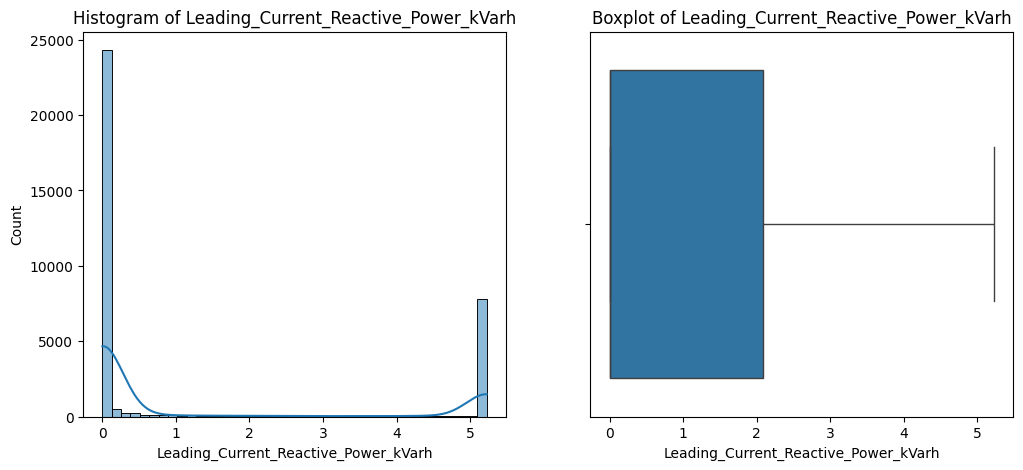

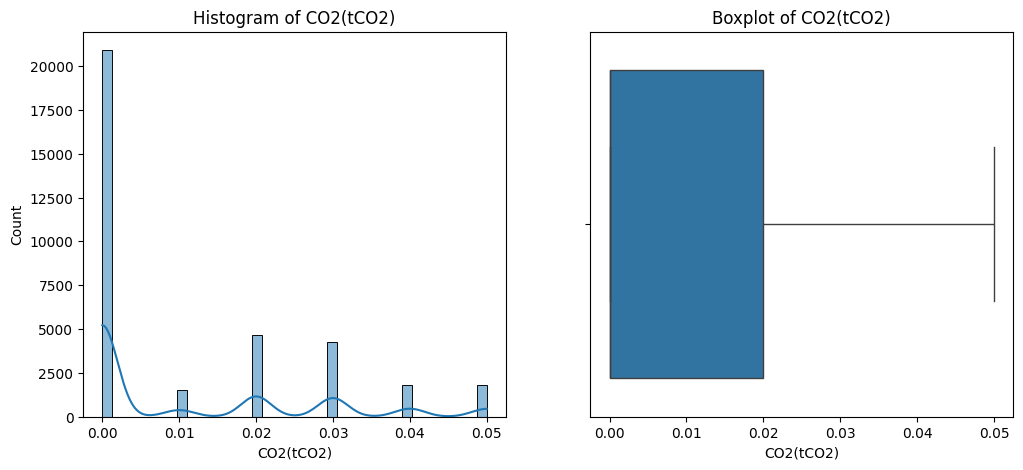

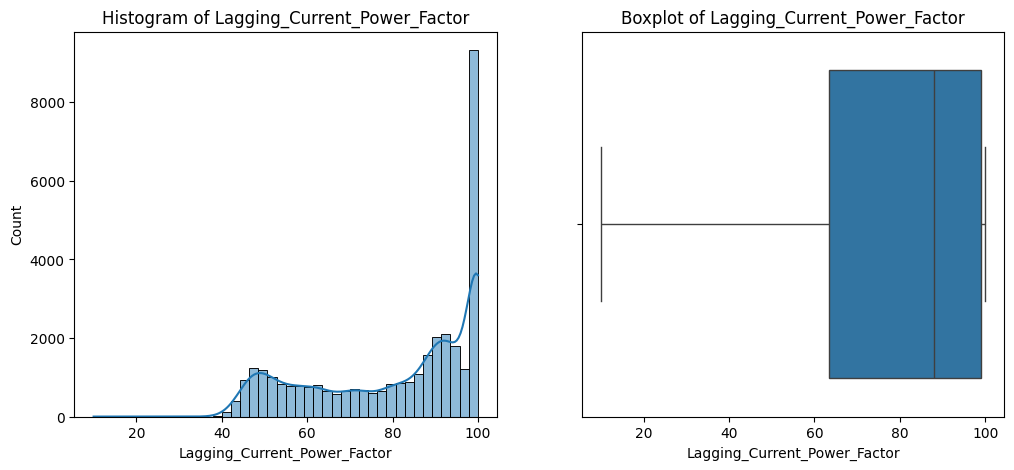

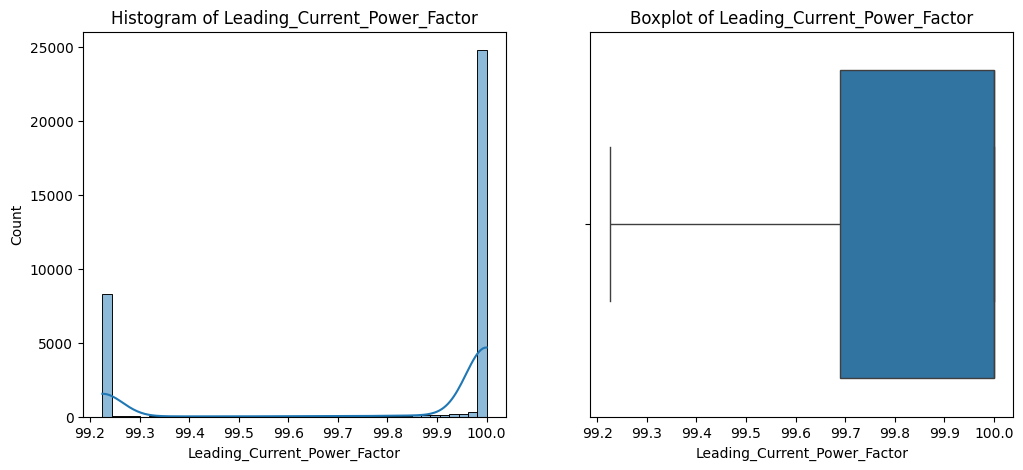

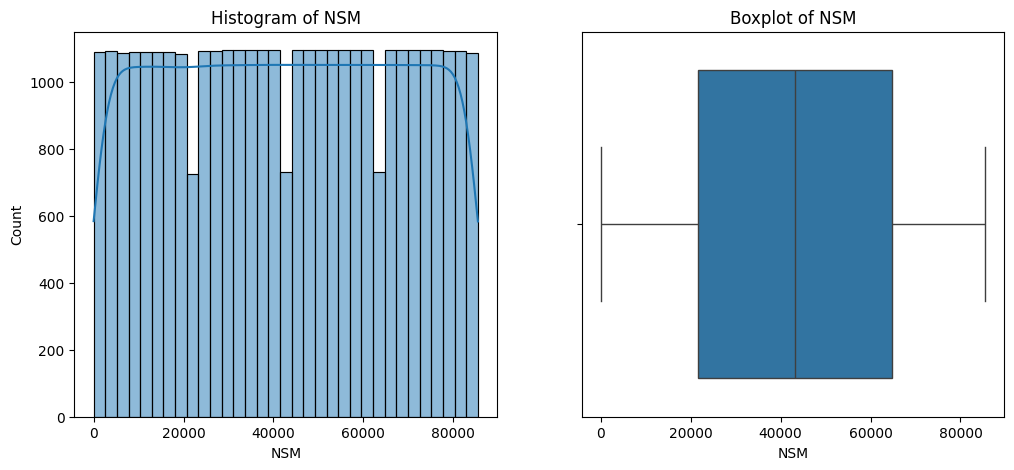

In [18]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

 ### here we use IQR method to treat outliers because other methods deduct number of rows extremely.

In [19]:
data.select_dtypes(include="number").skew()

Usage_kWh                               1.160594
Lagging_Current_Reactive.Power_kVarh    1.252707
Leading_Current_Reactive_Power_kVarh    1.168726
CO2(tCO2)                               1.055399
Lagging_Current_Power_Factor           -0.610087
Leading_Current_Power_Factor           -1.160587
NSM                                    -0.002367
dtype: float64

### We can see some changes in skewness level after treating outliers. Now we use methods like Log Trasform and Yeo-Johnson transformation to treat skewness.

In [20]:
 #Function to apply skewness reduction
def reduce_skewness(data, columns):
    data_transformed = data.copy()
    
    for col in columns:
        if data[col].min() > 0:  # If all values are positive, apply Log Transform
            data_transformed[col] = np.log1p(data[col])  # log(x + 1) to handle zeros
        else:  # For negative or mixed values, apply Yeo-Johnson transformation
            pt = PowerTransformer(method='yeo-johnson')
            data_transformed[col] = pt.fit_transform(data[[col]])  # Sklearn handles NaN automatically
    
    return data_transformed

# Apply skewness correction
data = data_transformed = reduce_skewness(data,numeric_columns)


In [21]:
data.select_dtypes(include="number").skew()

Usage_kWh                               0.341129
Lagging_Current_Reactive.Power_kVarh   -0.008125
Leading_Current_Reactive_Power_kVarh    0.976463
CO2(tCO2)                               0.555812
Lagging_Current_Power_Factor           -0.838030
Leading_Current_Power_Factor           -1.160758
NSM                                    -0.382948
dtype: float64

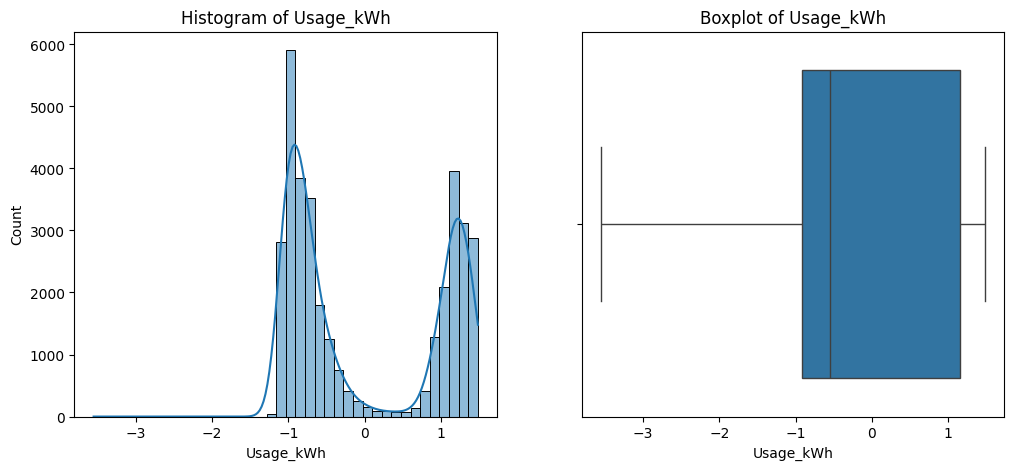

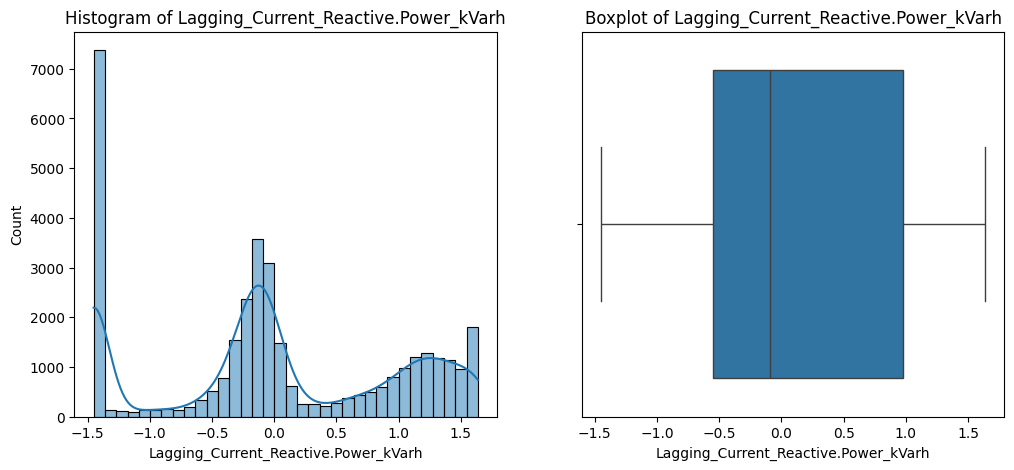

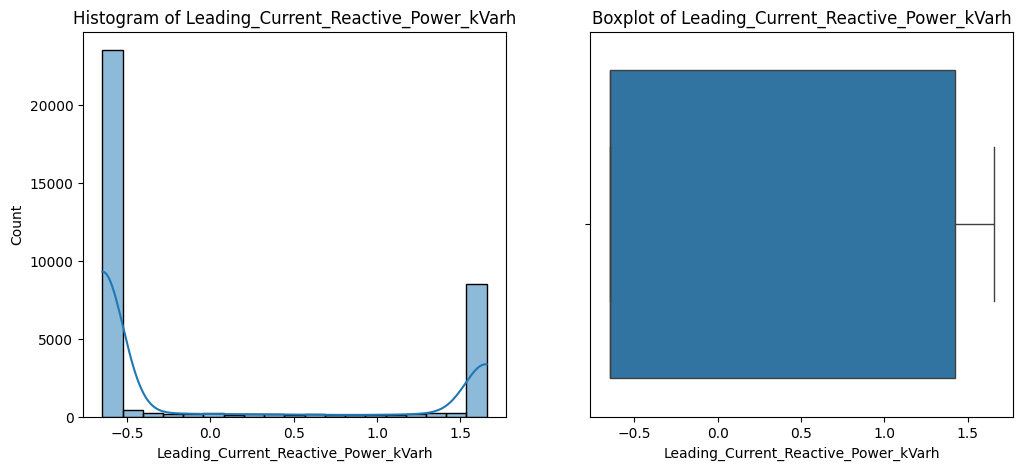

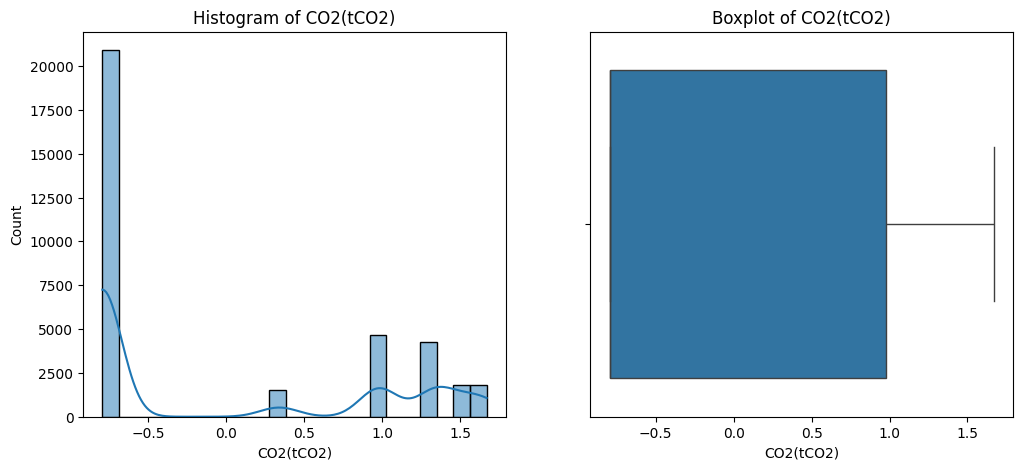

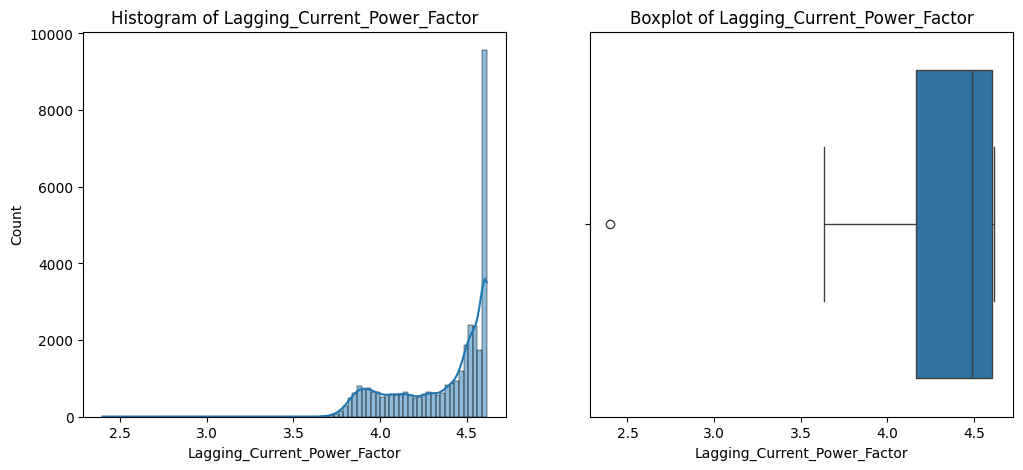

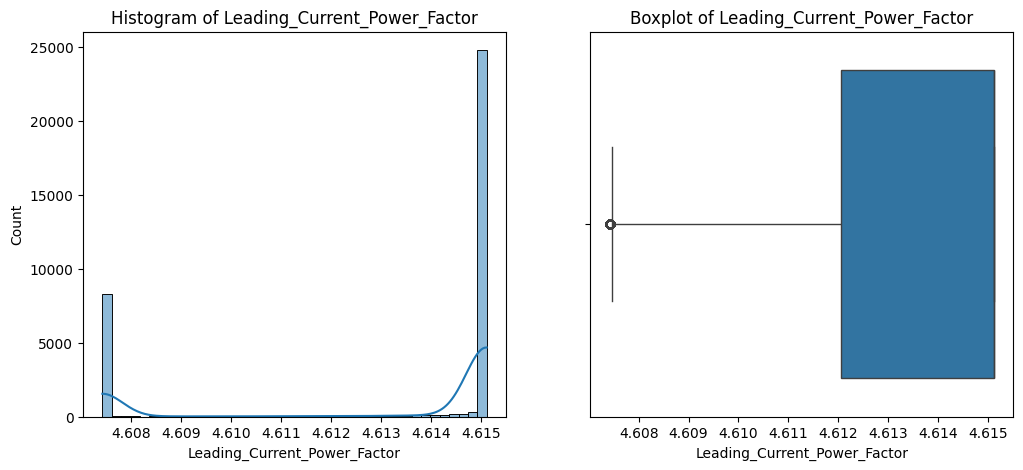

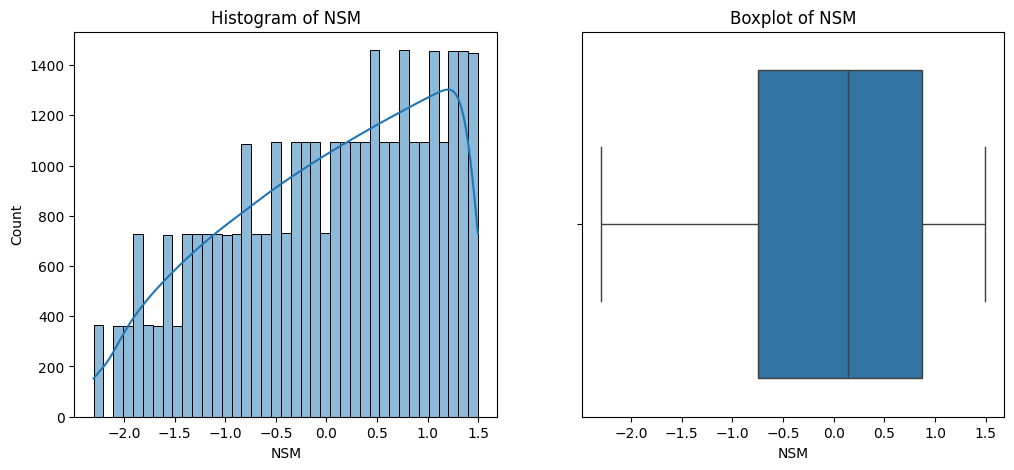

In [22]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

# Exploratory Data Analysis (EDA):

Initial data shape: (34959, 10)
          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  3.495900e+04                          3.495900e+04   
mean  -2.227623e-16                         -6.178809e-17   
std    1.000014e+00                          1.000014e+00   
min   -3.554806e+00                         -1.451215e+00   
25%   -9.104482e-01                         -5.503523e-01   
50%   -5.548992e-01                         -9.226246e-02   
75%    1.156028e+00                          9.790226e-01   
max    1.487102e+00                          1.637567e+00   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          3.495900e+04  3.495900e+04   
mean                           1.138202e-16  1.008122e-16   
std                            1.000014e+00  1.000014e+00   
min                           -6.474605e-01 -7.952923e-01   
25%                           -6.474605e-01 -7.952923e-01   
50%                           -6.474605e-01 -7.95292

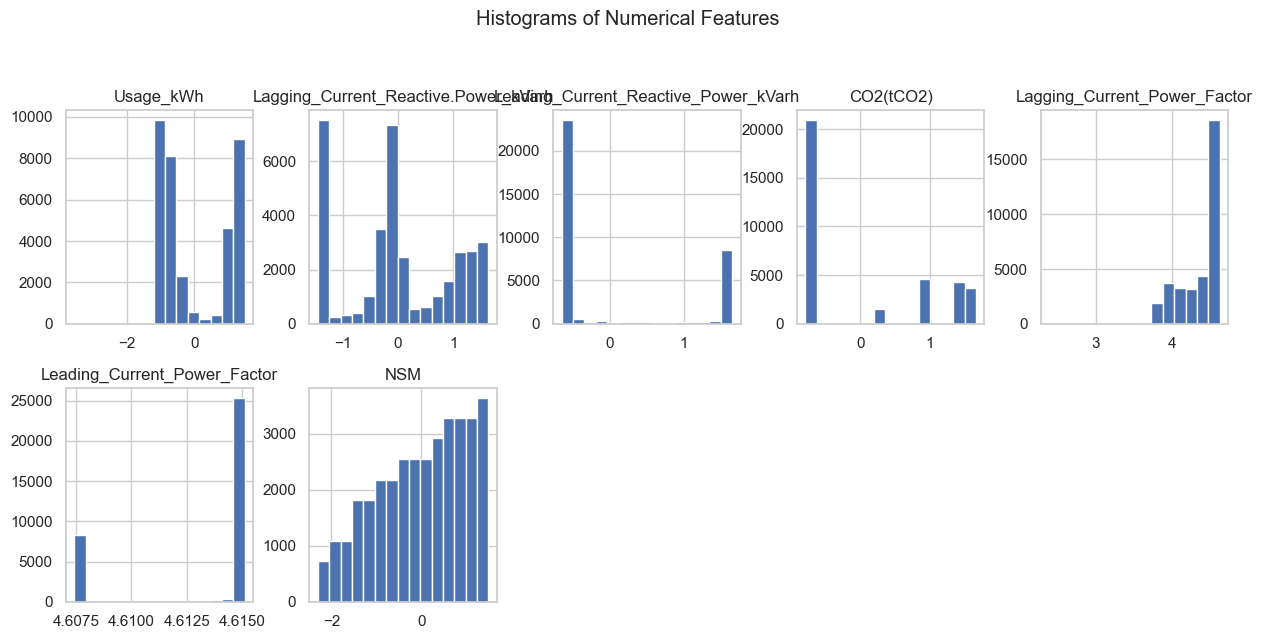

In [23]:
# Display initial data shape and summary statistics
print("Initial data shape:", data.shape)
print(data.describe())

# Display initial skewness
print("Initial skewness:\n", data.select_dtypes(include='number').skew())

# Set up the visualisation style
sns.set(style="whitegrid")

## 1. Histograms for all numerical features
data.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Insights

* Usage_kWh: The distribution appears to be positively skewed. The tail on the right is longer, suggesting that there are some high energy consumption values.
* Lagging_Current_Reactive_Power_kVarh: This distribution seems to be negatively skewed. The tail on the left is longer, indicating that there are some low values for lagging current reactive power.
* Leading_Current_Reactive_Power_kVarh: This distribution also appears to be negatively skewed. The tail on the left is longer, suggesting that there are some low values for leading current reactive power.
* CO2(tCO2): This distribution appears to be positively skewed. The tail on the right is longer, indicating that there are some high CO2 emissions.
* Lagging_Current_Power_Factor: This distribution seems to be positively skewed. The tail on the right is longer, suggesting that there are some high lagging current power factor values.
* Leading_Current_Power_Factor: This distribution appears to be positively skewed. The tail on the right is longer, indicating that there are some high leading current power factor values.
* NSM: This distribution appears to be positively skewed. The tail on the right is longer, suggesting that there are some high values for NSM.
Implications of Skewn

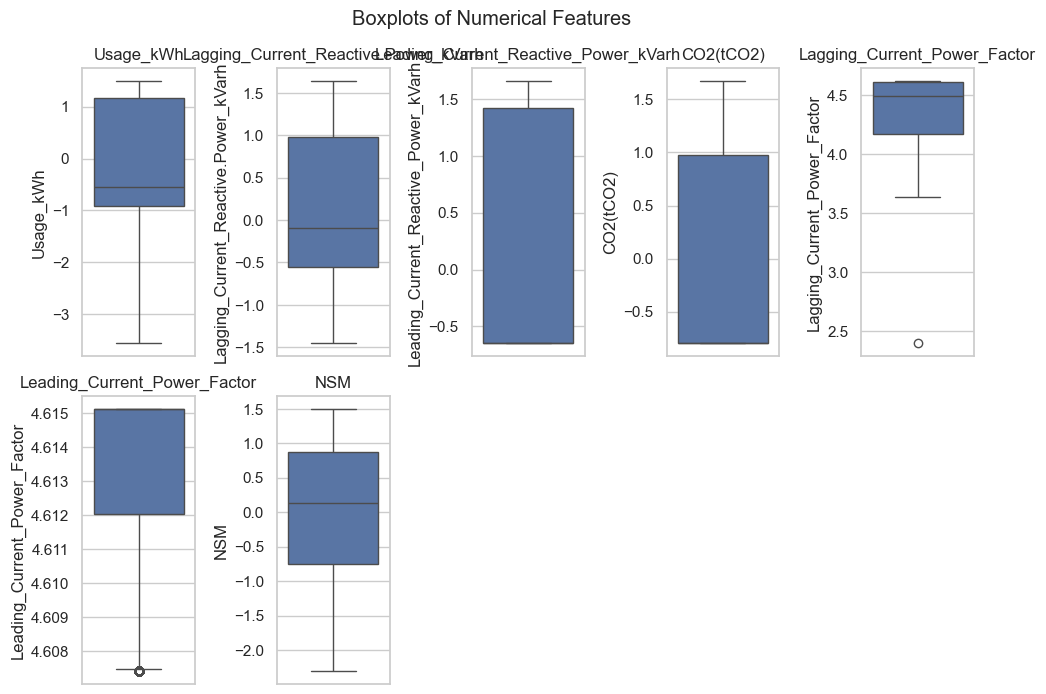

In [24]:
# 2. Boxplots for all numerical features
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

## Insights:

1. Usage_kWh:
No extreme outliers
Distribution is fairly balanced

2. Lagging_Current_Reactive_Power_kVarh:
Presence of outliers below the lower whisker
Data is mostly symmetric

3. Current_Reactive_Power_kVarh:
No significant outliers
Well-distributed values

4. CO2 (tCO2):
Shows some spread but no extreme outliers
Right-skewed distribution

5. Lagging_Current_Power_Factor:
Outliers present at the lower end (below 2.5)
Data is concentrated at the higher range

6. Leading_Current_Power_Factor:
A few outliers at the lower end
Highly concentrated in a small range

7. NSM:
Well-distributed
No major outliers




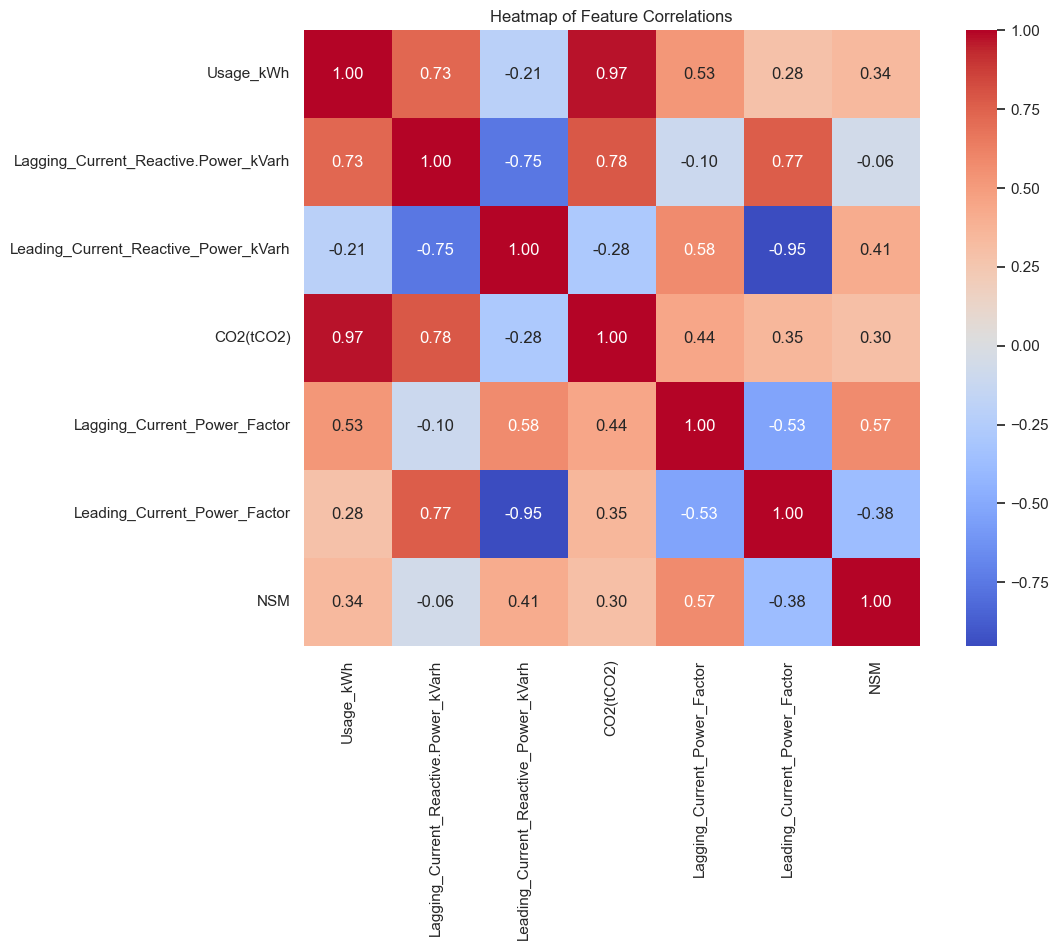

In [25]:
#3. Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

## Insights:

1. Usage_kWh:
 * Positive Correlations:
   * High positive correlation with CO2 (0.97). This suggests that higher energy consumption is strongly associated with increased CO2 emissions.
   * Moderate positive correlation with Lagging Current Power Factor (0.53) and Leading Current Power Factor (0.28). This indicates that energy usage has a positive relationship with both lagging and leading power factors, although the correlation is stronger with lagging power factor.
 * Negative Correlations:
   * Weak negative correlation with Lagging Current Reactive Power_kVarh (-0.21). This suggests that a slight decrease in lagging reactive power might be observed with increasing energy usage.
2. Lagging_Current_Reactive_Power_kVarh:
 * Positive Correlations:
   * High positive correlation with Lagging Current Power Factor (0.58). This indicates that lagging reactive power is strongly associated with a lagging power factor.
   * Moderate positive correlation with Leading Current Power Factor (0.77). This suggests that lagging reactive power is also somewhat related to leading power factor.
 * Negative Correlations:
   * Strong negative correlation with Leading Current Reactive Power_kVarh (-0.75). This indicates an inverse relationship between lagging and leading reactive power.
   * Moderate negative correlation with Usage_kWh (-0.21). This suggests that a slight decrease in lagging reactive power might be observed with increasing energy usage.
3. Leading_Current_Reactive_Power_kVarh:
 * Positive Correlations:
   * High positive correlation with Leading Current Power Factor (0.95). This indicates that leading reactive power is strongly associated with a leading power factor.
 * Negative Correlations:
   * Strong negative correlation with Lagging Current Reactive Power_kVarh (-0.75). This indicates an inverse relationship between leading and lagging reactive power.
   * Moderate negative correlation with Lagging Current Power Factor (-0.95). This suggests that leading reactive power is inversely related to lagging power factor.
4. CO2 (t/1000 kWh):
 * Positive Correlations:
   * High positive correlation with Usage_kWh (0.97). This suggests that higher energy consumption is strongly associated with increased CO2 emissions.
   * Moderate positive correlation with Lagging Current Power Factor (0.44) and Leading Current Power Factor (0.35). This indicates that CO2 emissions have a positive relationship with both lagging and leading power factors, although the correlation is stronger with lagging power factor.
5. Lagging_Current_Power_Factor:
 * Positive Correlations:
   * High positive correlation with Lagging Current Reactive Power_kVarh (0.58). This indicates that lagging power factor is strongly associated with lagging reactive power.
   * Moderate positive correlation with Usage_kWh (0.53) and CO2 (0.44). This suggests that lagging power factor is related to both energy consumption and CO2 emissions.
* Negative Correlations:
   * Strong negative correlation with Leading Current Power Factor (-0.53) and Leading Current Reactive Power_kVarh (-0.10). This indicates an inverse relationship between lagging power factor and both leading power factor and leading reactive power.
6. Leading_Current_Power_Factor:
 * Positive Correlations:
   * High positive correlation with Leading Current Reactive Power_kVarh (0.95). This indicates that leading power factor is strongly associated with leading reactive power.
   * Moderate positive correlation with Lagging Current Reactive Power_kVarh (0.77). This suggests that leading power factor is also somewhat related to lagging reactive power.
 * Negative Correlations:
   * Strong negative correlation with Lagging Current Power Factor (-0.53). This indicates an inverse relationship between leading and lagging power factors.
7. NSM:
 * Positive Correlations:
* Moderate positive correlation with Lagging Current Power Factor (0.57) and Leading Current Power Factor (0.38). This suggests that NSM has a positive relationship with both lagging and leading power factors.


-- Overall Observations:
 * Energy usage (Usage_kWh) has a strong positive relationship with CO2 emissions.
 * Lagging and leading reactive power have a strong inverse relationship.
 * Lagging and leading power factors have a strong inverse relationship.
 * Both lagging and leading power factors are related to both reactive power and energy usage.


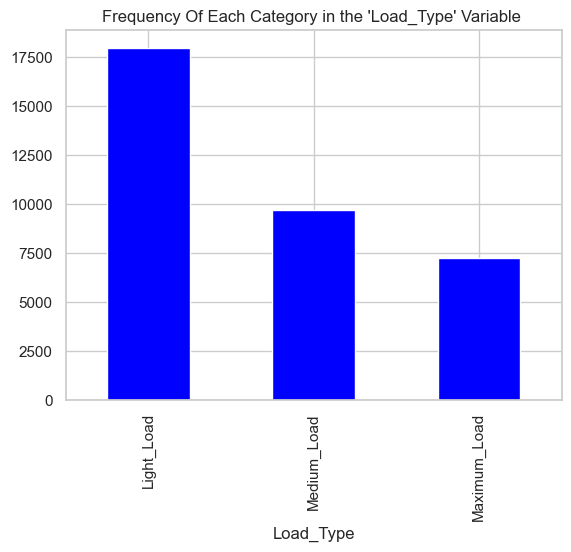

In [26]:
# 4.Bar chart for VISUALIZING THE "Load_Type"
data['Load_Type'].value_counts().plot(kind='bar',color = 'blue')
plt.title("Frequency Of Each Category in the 'Load_Type' Variable ")
plt.show()

## Insights

* Light Load Dominates: The category "Light Load" stands out with the highest frequency, indicating it is the most common type of load encountered.
* Medium Load is Second Most Frequent: The category "Medium Load" has the second-highest frequency, suggesting it is a relatively common occurrence.
* Maximum Load is Least Frequent: The category "Maximum Load" has the lowest frequency among the three categories, indicating it is the least common type of load.

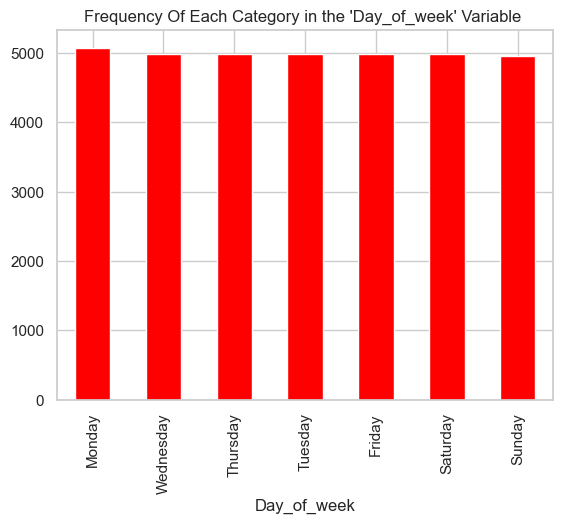

In [27]:
# VISUALIZING THE "Day_of_week"
data['Day_of_week'].value_counts().plot(kind='bar',color = 'red')
plt.title("Frequency Of Each Category in the 'Day_of_week' Variable ")
plt.show()

## Insights

* Uniform Distribution: The frequency of each day in the "Day_of_week" variable is almost the same, indicating that there is no significant variation in data occurrence across different days.

* No Weekly Pattern: If this dataset represents energy consumption, sales, or other business metrics, the consistency across all days suggests that there is no strong weekly trend or seasonality.


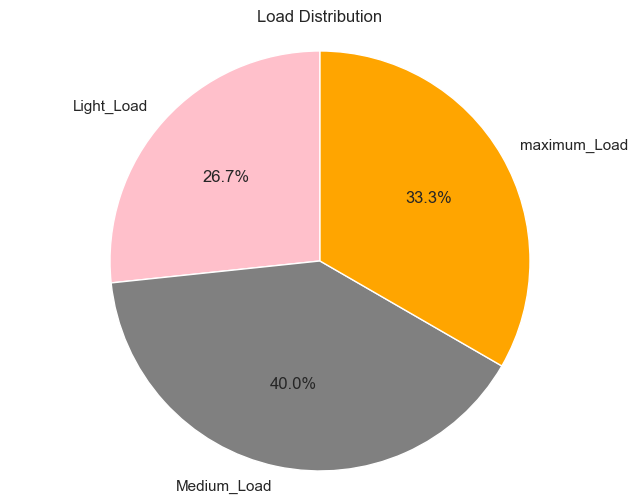

In [28]:
labels = ['Light_Load', 'Medium_Load', 'maximum_Load']
sizes = [20, 30 ,25]

plt.figure(figsize=(8, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'grey', 'orange'])

plt.title('Load Distribution')
plt.axis('equal')
plt.show()



## Insights

Balanced Load Distribution:

* Light Load accounts for 26.7% of the total load.
* Medium Load is the largest category, making up 40% of the total.
* Maximum Load represents 33.3% of the total.




# Feature Engineering:

In [29]:
X = data.drop(columns=['Usage_kWh'], axis=1) # Exclude target column
y = data['Usage_kWh']  # Target column

In [30]:
X

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,-0.413082,-0.647461,-0.795292,4.306899,4.615121,-2.102812,Weekday,Monday,Light_Load
1,-0.164841,-0.647461,-0.795292,4.216120,4.615121,-1.990137,Weekday,Monday,Light_Load
2,-0.351684,-0.647461,-0.795292,4.266616,4.615121,-1.896572,Weekday,Monday,Light_Load
3,-0.303133,-0.647461,-0.795292,4.235410,4.615121,-1.813595,Weekday,Monday,Light_Load
4,-0.159228,-0.647461,-0.795292,4.185403,4.615121,-1.737698,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,-0.110443,-0.647461,-0.795292,4.144721,4.615121,1.417807,Weekday,Monday,Light_Load
35036,-0.273446,-0.647461,-0.795292,4.272630,4.615121,1.443942,Weekday,Monday,Light_Load
35037,-0.371617,-0.376550,-0.795292,4.351825,4.614922,1.469978,Weekday,Monday,Light_Load
35038,-0.392073,-0.242622,-0.795292,4.365897,4.614724,1.495917,Weekday,Monday,Light_Load


In [31]:
y

0       -0.920045
1       -0.685841
2       -0.897804
3       -0.876081
4       -0.731698
           ...   
35035   -0.723887
35036   -0.752871
35037   -0.742221
35038   -0.742221
35039   -0.771819
Name: Usage_kWh, Length: 34959, dtype: float64

In [32]:
data_1=X.select_dtypes(include="object")
data_1

,WeekStatus,Day_of_week,Load_Type
0,Weekday,Monday,Light_Load
1,Weekday,Monday,Light_Load
2,Weekday,Monday,Light_Load
3,Weekday,Monday,Light_Load
4,Weekday,Monday,Light_Load
...,...,...,...
35035,Weekday,Monday,Light_Load
35036,Weekday,Monday,Light_Load
35037,Weekday,Monday,Light_Load
35038,Weekday,Monday,Light_Load


In [33]:
cat_cleaned_data_columns=list(data_1)
cat_cleaned_data_columns

['WeekStatus', 'Day_of_week', 'Load_Type']

## One-Hot Encoding¶

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the specified categorical columns
encoded_data = enc.fit_transform(X[cat_cleaned_data_columns]).toarray()

encoded_data

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [35]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(cat_cleaned_data_columns))

# Combine the encoded DataFrame with the original cleaned_data (excluding the original categorical columns)
x = pd.concat([X.drop(columns=cat_cleaned_data_columns).reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
x

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,-0.413082,-0.647461,-0.795292,4.306899,4.615121,-2.102812,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.164841,-0.647461,-0.795292,4.216120,4.615121,-1.990137,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.351684,-0.647461,-0.795292,4.266616,4.615121,-1.896572,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.303133,-0.647461,-0.795292,4.235410,4.615121,-1.813595,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.159228,-0.647461,-0.795292,4.185403,4.615121,-1.737698,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34954,-0.110443,-0.647461,-0.795292,4.144721,4.615121,1.417807,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34955,-0.273446,-0.647461,-0.795292,4.272630,4.615121,1.443942,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34956,-0.371617,-0.376550,-0.795292,4.351825,4.614922,1.469978,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34957,-0.392073,-0.242622,-0.795292,4.365897,4.614724,1.495917,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
x.shape

(34959, 18)

In [37]:
x.columns

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Load_Type_Light_Load', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')

# Feature Selection

In [38]:
k = 10  # Specify the number of top features to select 
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(x, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_indices]

# Display the selected features
print(f"Selected {k} best features:")
print(selected_features.tolist())

Selected 10 best features:
['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Load_Type_Light_Load', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load']


In [39]:
X_selected

array([[-0.41308154, -0.7952923 ,  4.30689891, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16484083, -0.7952923 ,  4.21611962, ...,  1.        ,
         0.        ,  0.        ],
       [-0.35168372, -0.7952923 ,  4.26661578, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.37161654, -0.7952923 ,  4.35182513, ...,  1.        ,
         0.        ,  0.        ],
       [-0.39207298, -0.7952923 ,  4.36589725, ...,  1.        ,
         0.        ,  0.        ],
       [-0.399647  , -0.7952923 ,  4.35952537, ...,  1.        ,
         0.        ,  0.        ]])

# Split Data into Training and Testing Sets

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(27967, 10)

In [42]:
x_test.shape

(6992, 10)

In [43]:
y_train.shape

(27967,)

In [44]:
y_test.shape

(6992,)

# Feature Scaling

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [46]:
x_train_scaled

array([[-0.09154781, -0.79421163, -1.40837675, ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-0.06880063, -0.79421163, -1.9459039 , ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-0.18399568, -0.79421163, -1.05654651, ...,  0.97134053,
        -0.51068292, -0.62146647],
       ...,
       [-1.44903657,  0.33976586,  0.93976687, ..., -1.02950507,
         1.95816223, -0.62146647],
       [-0.18399568, -0.79421163, -0.24886418, ...,  0.97134053,
        -0.51068292, -0.62146647],
       [-1.44903657,  0.33976586,  0.93976687, ..., -1.02950507,
        -0.51068292,  1.60909728]])

In [47]:
x_test_scaled

array([[ 1.64221295,  1.66579457,  0.60705457, ..., -1.03138471,
         1.92408023, -0.61106796],
       [-0.67000628,  0.33461933,  0.93472097, ..., -1.03138471,
        -0.51972885,  1.6364792 ],
       [ 1.08965421,  1.33886266,  0.58670806, ..., -1.03138471,
        -0.51972885,  1.6364792 ],
       ...,
       [ 0.03744709, -0.79962456, -0.9456603 , ...,  0.96957031,
        -0.51972885, -0.61106796],
       [ 1.31309864,  1.33886266,  0.35104157, ..., -1.03138471,
         1.92408023, -0.61106796],
       [ 0.96120168,  1.33886266,  0.73933985, ..., -1.03138471,
        -0.51972885,  1.6364792 ]])

# Build the ML model

In [48]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
# Define regression models
models = {
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
}

# Dictionary to store trained models
trained_models = {}

# Train models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train_scaled, y_train)
    trained_models[model_name] = model

print("\nModel Training Complete.\n")

# Dictionary to store model performance
model_performance = {}



Training SVR...
Training MLP Regressor...
Training Random Forest Regressor...
Training Linear Regression...
Training Gradient Boosting...
Training AdaBoost Regressor...

Model Training Complete.



# Model Evaluation

In [50]:
# Evaluate models
for model_name, model in trained_models.items():
    print(f"Evaluating {model_name}...\n")
    
    # Predictions on Training Set
    y_train_pred = model.predict(x_train_scaled)
    
    # Predictions on Test Set
    y_test_pred = model.predict(x_test_scaled)
    
    # Training Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Testing Metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    model_performance[model_name] = {
        "Training MAE": train_mae,
        "Training MSE": train_mse,
        "Training R2 Score": train_r2,
        "Testing MAE": test_mae,
        "Testing MSE": test_mse,
        "Testing R2 Score": test_r2
    }


Evaluating SVR...

Evaluating MLP Regressor...

Evaluating Random Forest Regressor...

Evaluating Linear Regression...

Evaluating Gradient Boosting...

Evaluating AdaBoost Regressor...



In [51]:
# Display results
for model, scores in model_performance.items():
    print(f"\nModel: {model}")
    print(f"Training - MAE: {scores['Training MAE']}, MSE: {scores['Training MSE']}, R2: {scores['Training R2 Score']}")
    print(f"Testing  - MAE: {scores['Testing MAE']}, MSE: {scores['Testing MSE']}, R2: {scores['Testing R2 Score']}")



Model: SVR
Training - MAE: 0.06456786263598947, MSE: 0.010958604580082836, R2: 0.9890266666546309
Testing  - MAE: 0.0651155885171473, MSE: 0.012488888606749777, R2: 0.9875777921383361

Model: MLP Regressor
Training - MAE: 0.04984628105297094, MSE: 0.009781841207332649, R2: 0.9902050116403855
Testing  - MAE: 0.04823170556464681, MSE: 0.009439143657184111, R2: 0.9906112538723201

Model: Random Forest Regressor
Training - MAE: 0.031701067751513275, MSE: 0.0070311513379753745, R2: 0.9929593985375136
Testing  - MAE: 0.038805467234085865, MSE: 0.009158126655941807, R2: 0.9908907704659909

Model: Linear Regression
Training - MAE: 0.1500668425020981, MSE: 0.040348950943424, R2: 0.9595968185910408
Testing  - MAE: 0.14772835162840198, MSE: 0.03821610181400358, R2: 0.9619879418141745

Model: Gradient Boosting
Training - MAE: 0.06251518437337614, MSE: 0.011941831417680075, R2: 0.9880421183242096
Testing  - MAE: 0.06267549813251386, MSE: 0.012055990937349685, R2: 0.9880083784780374

Model: AdaBoos

In [52]:

# Initialize an empty list to store the results
results = []

# Loop through the trained models to calculate evaluation metrics
for name, model in trained_models.items():
    # Predictions on Training Set
    y_train_pred = model.predict(x_train_scaled)
    
    # Predictions on Testing Set
    y_test_pred = model.predict(x_test_scaled)
    
    # Calculate Training Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate Testing Metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store the results in the list
    results.append({
        "Model": name,
        "Training MAE": train_mae,
        "Training MSE": train_mse,
        "Training RMSE": train_rmse,
        "Training R² Score": train_r2,
        "Testing MAE": test_mae,
        "Testing MSE": test_mse,
        "Testing RMSE": test_rmse,
        "Testing R² Score": test_r2
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the model performance summary
print("Model Performance Summary:")
results_df


Model Performance Summary:


,Model,Training MAE,Training MSE,Training RMSE,Training R² Score,Testing MAE,Testing MSE,Testing RMSE,Testing R² Score
0,SVR,0.064568,0.010959,0.104683,0.989027,0.065116,0.012489,0.111754,0.987578
1,MLP Regressor,0.049846,0.009782,0.098903,0.990205,0.048232,0.009439,0.097155,0.990611
2,Random Forest Regressor,0.031701,0.007031,0.083852,0.992959,0.038805,0.009158,0.095698,0.990891
3,Linear Regression,0.150067,0.040349,0.200870,0.959597,0.147728,0.038216,0.195489,0.961988
4,Gradient Boosting,0.062515,0.011942,0.109279,0.988042,0.062675,0.012056,0.109800,0.988008
5,AdaBoost Regressor,0.125056,0.027656,0.166301,0.972307,0.125957,0.028770,0.169616,0.971384


## Insights :

1. Best Model Based on Performance:

* Random Forest Regressor has the lowest MSE (0.009158) and RMSE (0.095698), with a very high R² Score (0.990891), making it the most accurate model  among all.
* MLP Regressor also performs exceptionally well with a slightly higher RMSE (0.097155) but a slightly better R² Score (0.990611).

2. Support Vector Regressor (SVR) and Gradient Boosting also exhibit strong performance with R² scores close to 0.99.

3. Linear Regression Shows the Weakest Performance:

* It has the highest MAE (0.147728), MSE (0.038216), and RMSE (0.195489).
Its R² Score is 0.961988, indicating it is less capable of explaining variance compared to other models.

4. AdaBoost Regressor is also less effective compared to the top models:

* Higher RMSE (0.169616) Lower R² Score (0.971384) compared to Random Forest and MLP.

## Final Recommendation

* Random Forest Regressor is the best model based on the lowest RMSE and highest R² score.

* MLP Regressor and Gradient Boosting are also strong alternatives with comparable performance.

* Linear Regression and AdaBoost perform worse, so they may not be suitable for accurate predictions.



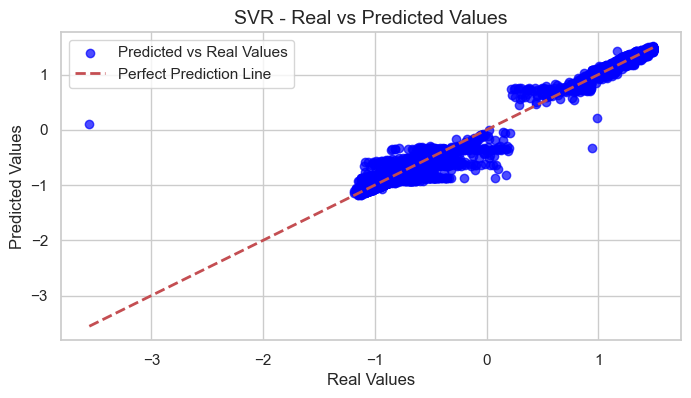

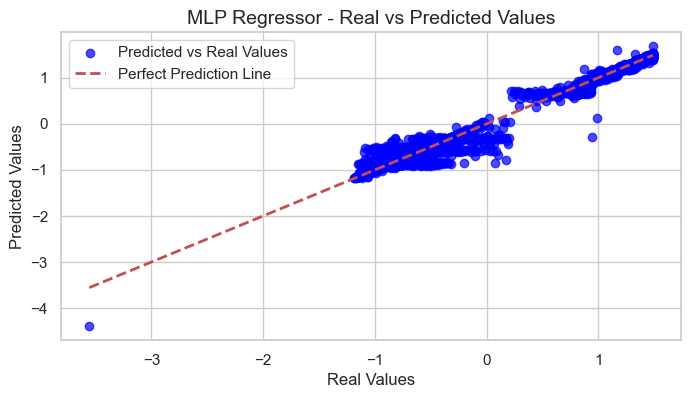

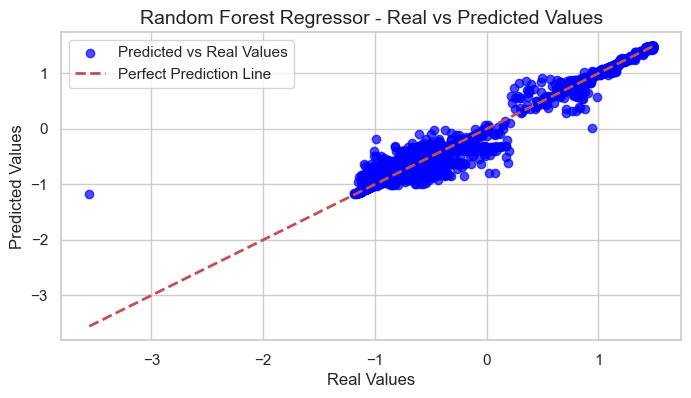

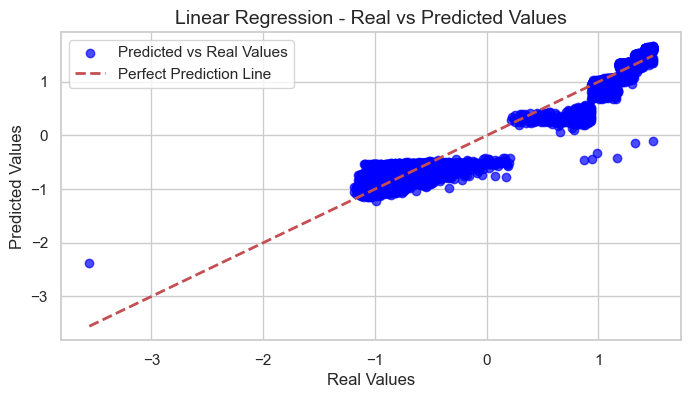

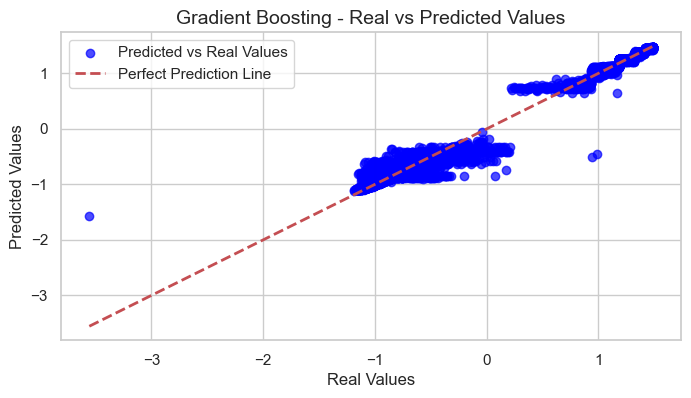

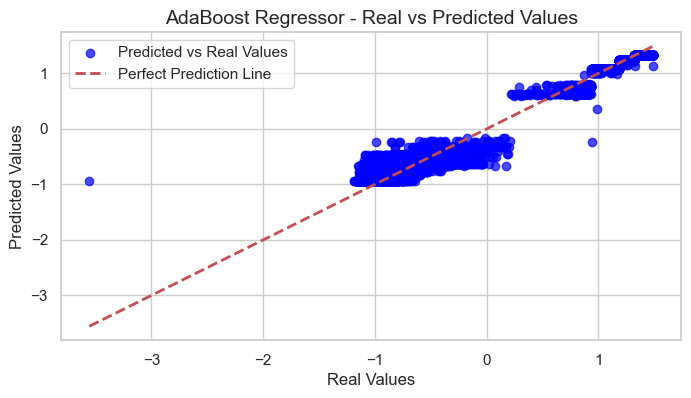

In [53]:
# Loop through the trained models and plot real vs predicted values
for name, model in trained_models.items():
    y_pred = model.predict(x_test_scaled)

    # Plot real vs predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real Values', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line', lw=2)  # Line of perfect prediction
    plt.title(f'{name} - Real vs Predicted Values', fontsize=14)
    plt.xlabel('Real Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

## Insights 

* Both SVR and MLP shows good predictions as points are close to the perfect prediction line. Some deviation exist, but over they follow correct trend.
* Random Forest Regressor : Predictions align well with perfect prediction line. Slight spread around the line, but it has high accuracy and best performing model with minimal errors.
* Linear Regression: More deviation from the perfect line, meaning high errors. Struggles to capture complex patterns in the data and worst performer among the models.
* Gradient Boosting: The points are closely clustered around the perfect prediction line, indicating that the model's predictions are generally accurate. There are some deviations, but they are not significant.
* AdaBoost Regressor: Similar to Gradient Boosting, the points are also close to the perfect prediction line, suggesting good predictive performance. However, there's a slightly larger spread of points, indicating potentially higher prediction errors for some instances



In [54]:
# Find the best model based on the highest Testing R² Score
best_model_index = results_df["Testing R² Score"].idxmax()  # Find index of the best model
best_model = results_df.loc[best_model_index]  # Retrieve the row with best model metrics

print("\nBest Model:")
print(f" Model: {best_model['Model']}")
print(f" Metrics:\n{best_model}")




Best Model:
 Model: Random Forest Regressor
 Metrics:
Model                Random Forest Regressor
Training MAE                        0.031701
Training MSE                        0.007031
Training RMSE                       0.083852
Training R² Score                   0.992959
Testing MAE                         0.038805
Testing MSE                         0.009158
Testing RMSE                        0.095698
Testing R² Score                    0.990891
Name: 2, dtype: object


# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grids = {
    "SVR": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.1]
    },
    "MLP Regressor": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    "Random Forest Regressor": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5]
    },
    "AdaBoost Regressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}
# Perform grid search for each model (excluding Linear Regression)
best_models = {}
tuning_results = {}

for name, model in models.items():
    if name != "Linear Regression":  # Skip Linear Regression
        print(f"\
Tuning {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train_scaled, y_train)

        # Store best model
        best_models[name] = grid_search.best_estimator_

        # Store results
        tuning_results[name] = {
            'Best Parameters': grid_search.best_params_,
            'Best R2 Score': grid_search.best_score_
        }

        # Print results
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation R2 score: {grid_search.best_score_:.4f}")

Tuning SVR...
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation R2 score: 0.9893
Tuning MLP Regressor...
Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
Best cross-validation R2 score: 0.9902
Tuning Random Forest Regressor...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation R2 score: 0.9914
Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation R2 score: 0.9914
Tuning AdaBoost Regressor...
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation R2 score: 0.9708


In [57]:
# Add Linear Regression results without tuning
best_models["Linear Regression"] = LinearRegression()
best_models["Linear Regression"].fit(x_train_scaled, y_train)


# Evaluate all models (including Linear Regression) on test set
final_results = {}
for name, model in best_models.items():
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    final_results[name] = {"MSE": mse, "R2": r2, "MAE": mae}

# Display final results
final_results_df = pd.DataFrame(final_results).T
print("\
Final evaluation results after tuning:")
final_results_df

Final evaluation results after tuning:


,MSE,R2,MAE
SVR,0.011973,0.988091,0.061696
MLP Regressor,0.009245,0.990804,0.050716
Random Forest Regressor,0.009010,0.991038,0.038599
Gradient Boosting,0.008345,0.991700,0.042732
AdaBoost Regressor,0.029427,0.970730,0.122410
Linear Regression,0.038216,0.961988,0.147728


In [58]:
# Find the best model based on R² score 
best_model_name = final_results_df['R2'].idxmax()
best_model_score = final_results_df['R2'].max()

print(f"\nBest Model: {best_model_name} with R² Score: {best_model_score:.4f}")


Best Model: Gradient Boosting with R² Score: 0.9917


In [59]:
results_df   # before hyperparameter tuning

,Model,Training MAE,Training MSE,Training RMSE,Training R² Score,Testing MAE,Testing MSE,Testing RMSE,Testing R² Score
0,SVR,0.064568,0.010959,0.104683,0.989027,0.065116,0.012489,0.111754,0.987578
1,MLP Regressor,0.049846,0.009782,0.098903,0.990205,0.048232,0.009439,0.097155,0.990611
2,Random Forest Regressor,0.031701,0.007031,0.083852,0.992959,0.038805,0.009158,0.095698,0.990891
3,Linear Regression,0.150067,0.040349,0.200870,0.959597,0.147728,0.038216,0.195489,0.961988
4,Gradient Boosting,0.062515,0.011942,0.109279,0.988042,0.062675,0.012056,0.109800,0.988008
5,AdaBoost Regressor,0.125056,0.027656,0.166301,0.972307,0.125957,0.028770,0.169616,0.971384


In [60]:
final_results_df   # after hyperparameter tuning

,MSE,R2,MAE
SVR,0.011973,0.988091,0.061696
MLP Regressor,0.009245,0.990804,0.050716
Random Forest Regressor,0.009010,0.991038,0.038599
Gradient Boosting,0.008345,0.991700,0.042732
AdaBoost Regressor,0.029427,0.970730,0.122410
Linear Regression,0.038216,0.961988,0.147728


## Insights:

* Gradient Boosting emerges as the best model  based on R² Score (0.9917 after tuning). This indicates its strong predictive power and ability to explain the variance in the data.
 * Hyperparameter Tuning Impact:
   * R² Score improved for all models after tuning except Adaboost Regressor.
   * MAE decreased for all models, indicating better accuracy in predictions.
   * MSE decreased for all models (except Adaboost Regressor), implying smaller prediction errors.
 * Model Performance Comparison:
   * Gradient Boosting  and Random Forest Regressor consistently performs well, even before tuning.
   * Linear Regression shows the least improvement after tuning, likely due to its simpler structure.
   * Other models like SVR and MLP Regressor,  also benefit from tuning.


# Save the Model:

In [61]:
import joblib 
gb_model = best_models["Gradient Boosting"]
joblib.dump(gb_model,"Gradient_Boosting.pkl")
print("Gradient boosting model savsed as 'Gradient_boosting.pkl'")

Gradient boosting model savsed as 'Gradient_boosting.pkl'


In [62]:
from IPython.display import FileLink
FileLink("Gradient_Boosting.pkl")

C:\Users\nafla\Gradient_Boosting.pkl

#  Test with Unseen Data:

In [78]:
import pandas as pd

# Load unseen data from CSV file
unseen_data = pd.read_csv(r"C:\Users\nafla\Downloads\unseen_steel_industry_data.csv")


In [79]:

# Display the first few rows of the dataset
print("Initial Unseen Data:")
print(unseen_data.head())

Initial Unseen Data:
               date   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  31/12/2018 00:15  124.019241                             68.687329   
1  31/12/2018 00:30   95.749560                             53.157152   
2  31/12/2018 00:45   14.914139                             21.756139   
3  31/12/2018 01:00   35.785305                             76.974752   
4  31/12/2018 01:15   25.644105                              5.649025   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                             27.044657   0.020622   
1                             26.468136   0.011369   
2                              0.813274   0.010978   
3                             12.331212   0.061326   
4                              4.301319   0.006133   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                     24.283451                     70.405441     0   
1                     25.456939                     32.518073   900   
2 

In [80]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  25 non-null     object 
 1   Usage_kWh                             25 non-null     float64
 2   Lagging_Current_Reactive.Power_kVarh  25 non-null     float64
 3   Leading_Current_Reactive_Power_kVarh  25 non-null     float64
 4   CO2(tCO2)                             25 non-null     float64
 5   Lagging_Current_Power_Factor          25 non-null     float64
 6   Leading_Current_Power_Factor          25 non-null     float64
 7   NSM                                   25 non-null     int64  
 8   WeekStatus                            25 non-null     object 
 9   Day_of_week                           25 non-null     object 
 10  Load_Type                             25 non-null     object 
dtypes: float64(6), int64(

In [81]:
unseen_data = unseen_data.drop(columns=['date'])
unseen_data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,124.019241,68.687329,27.044657,0.020622,24.283451,70.405441,0,Weekday,Saturday,Maximum_Load
1,95.749560,53.157152,26.468136,0.011369,25.456939,32.518073,900,Weekday,Wednesday,Light_Load
2,14.914139,21.756139,0.813274,0.010978,59.923830,16.009565,1800,Weekday,Wednesday,Medium_Load
3,35.785305,76.974752,12.331212,0.061326,35.008616,3.018559,2700,Weekend,Saturday,Light_Load
4,25.644105,5.649025,4.301319,0.006133,9.767988,28.942783,3600,Weekend,Wednesday,Light_Load
5,86.070348,7.898922,17.196452,0.006587,88.088374,17.624788,4500,Weekend,Friday,Light_Load
6,150.605958,26.105254,11.490487,0.027925,78.686241,63.093129,5400,Weekend,Thursday,Medium_Load
7,114.387297,38.934644,20.167684,0.051248,1.515675,31.758479,6300,Weekday,Monday,Medium_Load
8,121.005664,53.063039,2.390553,0.069203,89.734181,29.923618,7200,Weekend,Friday,Medium_Load
9,79.606500,3.254598,9.528415,0.037834,13.069713,32.595933,8100,Weekday,Friday,Medium_Load


In [82]:
# Check for missing values
print("\nMissing Values:")
print(unseen_data.isnull().sum())


Missing Values:
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


There is no missing values

In [83]:
# Check for duplicates
unseen_data.duplicated().sum()

0

In [84]:
num_data = unseen_data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

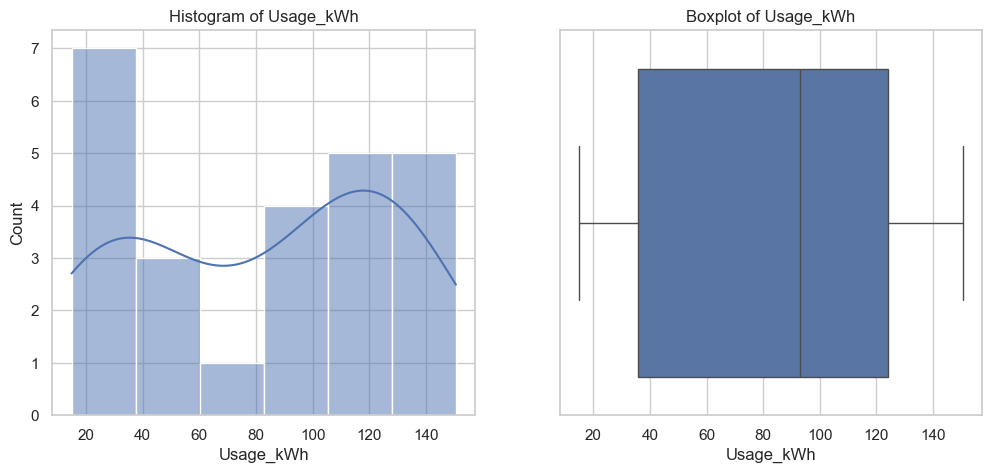

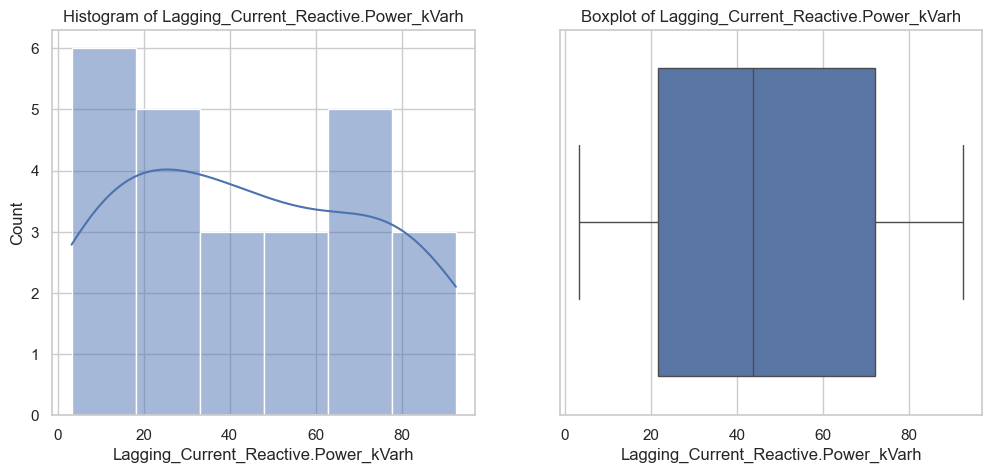

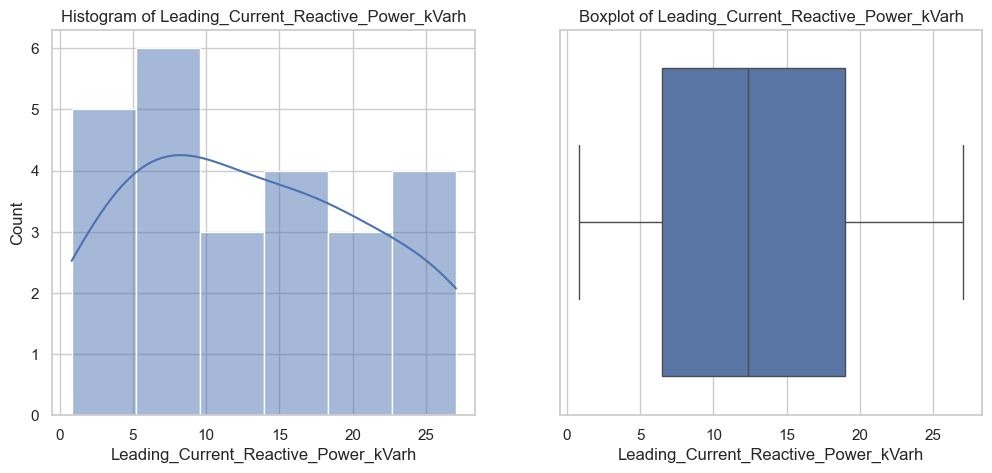

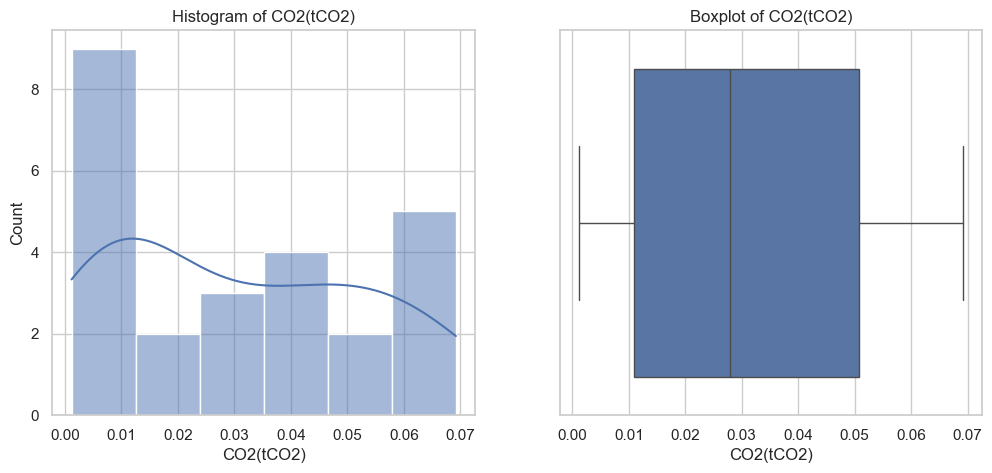

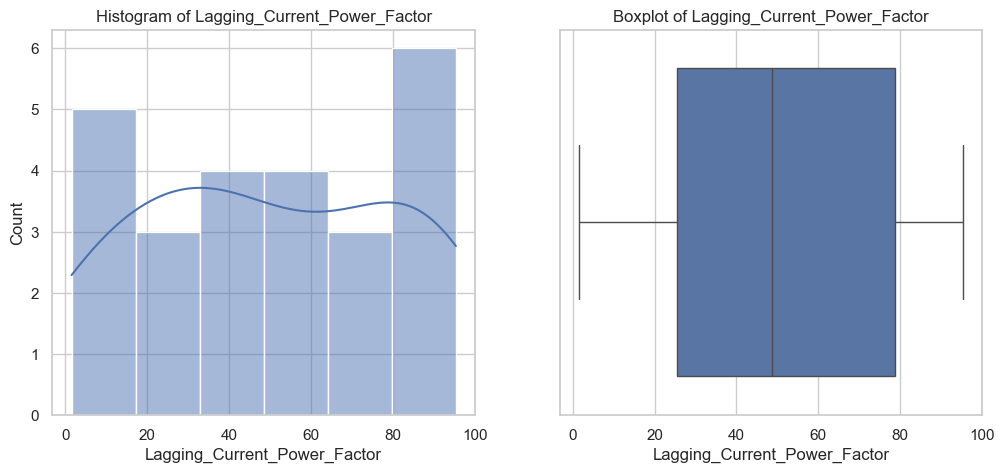

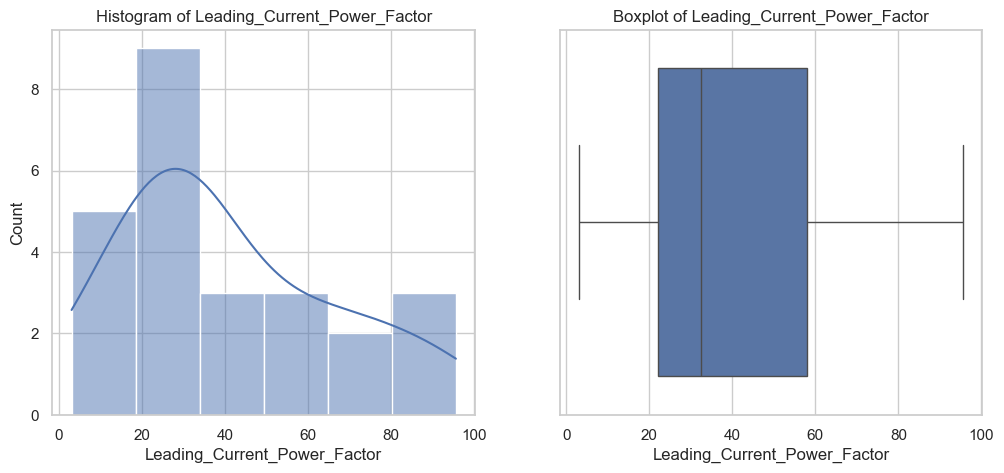

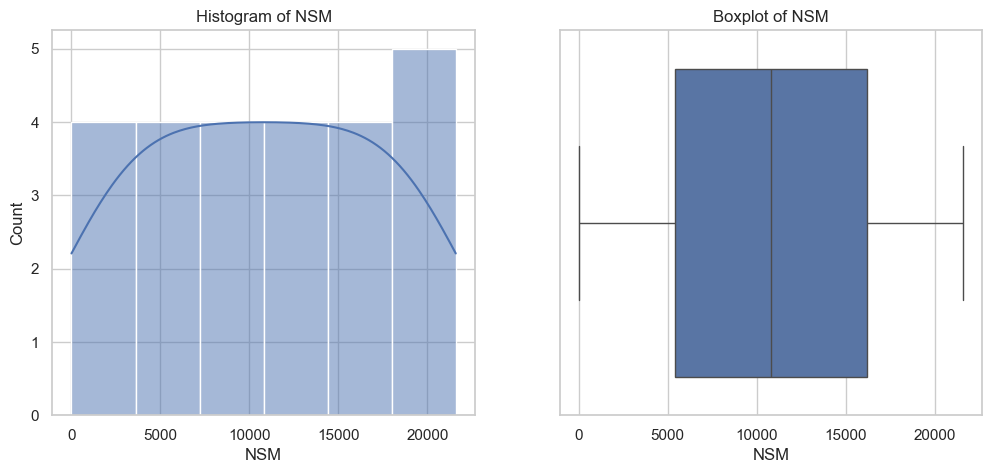

In [85]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(unseen_data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=unseen_data[column])
    plt.title(f'Boxplot of {column}')

The dataset has no significant outliers

In [86]:
#  Check for skewness
skewness = unseen_data.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)


Skewness of each feature:
Usage_kWh                              -0.182553
Lagging_Current_Reactive.Power_kVarh    0.174529
Leading_Current_Reactive_Power_kVarh    0.239632
CO2(tCO2)                               0.318496
Lagging_Current_Power_Factor           -0.015028
Leading_Current_Power_Factor            0.693390
NSM                                     0.000000
dtype: float64


Values are close to 0, this indicates it is a symmetric distribution

In [87]:
# Feature Engineering:
cat_data = unseen_data.select_dtypes(include="object")
num_data = unseen_data.select_dtypes(include="number")


#  One-Hot Encoding for Categorical Features
cat_data_encoded = pd.get_dummies(cat_data, dtype=int)

# Display encoded categorical data
print("Encoded categorical data:\n", cat_data_encoded.head())

# Combine Encoded DataFrames
encoded_data = pd.concat([num_data, cat_data_encoded], axis=1)

# Display final encoded dataset shape
print("Final encoded dataset shape:", encoded_data.shape)


Encoded categorical data:
    WeekStatus_Weekday  WeekStatus_Weekend  Day_of_week_Friday  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   Day_of_week_Monday  Day_of_week_Saturday  Day_of_week_Sunday  \
0                   0                     1                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     1                   0   
4                   0                     0                   0   

   Day_of_week_Thursday  Day_of_week_Tuesday  Day_of_week_Wednesday  \
0                     0                    0                      0   
1                     0              

In [88]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             25 non-null     float64
 1   Lagging_Current_Reactive.Power_kVarh  25 non-null     float64
 2   Leading_Current_Reactive_Power_kVarh  25 non-null     float64
 3   CO2(tCO2)                             25 non-null     float64
 4   Lagging_Current_Power_Factor          25 non-null     float64
 5   Leading_Current_Power_Factor          25 non-null     float64
 6   NSM                                   25 non-null     int64  
 7   WeekStatus_Weekday                    25 non-null     int32  
 8   WeekStatus_Weekend                    25 non-null     int32  
 9   Day_of_week_Friday                    25 non-null     int32  
 10  Day_of_week_Monday                    25 non-null     int32  
 11  Day_of_week_Saturday 

In [92]:
encoded_data.drop(columns=['Usage_kWh' , 'Leading_Current_Reactive_Power_kVarh', 'Day_of_week_Friday', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday','Day_of_week_Tuesday', 'Day_of_week_Wednesday'
                  ] ,axis = 1,inplace = True)

In [93]:
scaler = StandardScaler()
unseen_data_scaled = scaler.fit_transform(encoded_data)


# Convert back to DataFrame for consistency
unseen_data_scaled = pd.DataFrame(unseen_data_scaled, columns=encoded_data.columns)

In [94]:
gb_model = joblib.load("Gradient_Boosting.pkl")
print("Model loaded successfully!")

Model loaded successfully!


In [95]:
predictions = gb_model.predict(unseen_data_scaled)

C:\Users\nafla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [96]:
print("Predictions on Unseen Data:", predictions)

Predictions on Unseen Data: [ 0.20794603 -0.04044249 -0.4789562   1.07486788 -1.69829302 -0.25731784
  0.82904505  0.28165726  1.77623019 -0.77705638  0.97859787  0.21014285
  1.01275925 -0.03143717  0.4740626   0.93926605  0.91276227 -0.95397592
  0.11433493  0.63188506  0.36196369  1.7068923   0.57005386 -0.14226075
  1.39807033]


# Interpretation of Results (Conclusion)

In this project, we developed and evaluated multiple machine learning models to predict steel industry energy consumption based on various input features. The dataset underwent extensive preprocessing, including feature scaling, before being used to train different regression models.

Among the tested models, Gradient Boosting emerged as the best-performing model, achieving an R² score of 0.9917 after hyperparameter tuning. This indicates that the model can explain 99.17% of the variance in energy consumption, demonstrating a high level of accuracy.

To ensure model generalization, predictions were made on unseen data using the saved Gradient Boosting model. The predicted values varied across different input conditions, reflecting the model's ability to adapt to various energy consumption patterns.

While the model performed exceptionally well on the test set, further validation on real-world unseen data is recommended to assess its robustness. Potential areas for improvement include experimenting with additional feature selection techniques, fine-tuning hyperparameters further, and incorporating more diverse training data.

Overall, this project successfully developed a highly accurate predictive model for steel industry energy consumption, which can be valuable for optimizing energy efficiency and reducing operational costs in industrial settings.




## Limitations

* The dataset has missing key factors like weather conditions, machine efficiency, and production shifts, which could improve predictions.

*  Possible missing values, noise, or outliers may also affect model accuracy. Additionally, since the data is from a single steel plant, the model may not generalize well to other industries or locations.

* The model depends on feature scaling, meaning all new data must be processed similarly for accurate predictions. The dataset also does not support real-time energy monitoring, limiting its use in live industrial applications. 

 # Future Work

This project provides valuable insights into energy consumption in the steel industry, but there is room for improvement to enhance model performance and real-world applicability.

Future work can focus on adding more relevant features, such as weather conditions, machine workload, operational shifts, and production schedules, to improve prediction accuracy. Expanding the dataset to include multiple steel plants would enhance the model’s ability to generalize across different industrial settings.

Additionally, integrating real-time energy consumption tracking could make the model more useful for live monitoring and decision-making. Implementing advanced deep learning models and time-series forecasting techniques may also help in predicting future energy consumption more accurately, leading to better energy optimization strategies.